In [1]:
# If you are correctiong my sheet. I would be interessted in knowing if you also used tensorflow to import the data?
# Maybe you could put that in your comment

## Logistic Regression
- Dependent variable is categorical --> predicts if sth. is true or false
- MNIST database: large database of handwritten digits that is commonly used for training various image processing systems
- How many features is too many? And which features are most important to include? Regularization can help.
- Ridge and Lasso regularization both work by adding a new term to the cost function

In [2]:
import numpy as np # images are numpy arrays
from sklearn.linear_model import LogisticRegression
import tensorflow as tf # needed for the MNIST data set 
import matplotlib.pyplot as plt

# clf=classifier

In [3]:
mnist = tf.keras.datasets.mnist # our data set

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # documentation of load_data function shows how it loads data
# x: images are np arrays
# y: corressponding number 

In [6]:
# look at data 

print(np.shape(x_train)) # 60.000 train images
print(np.shape(x_test)) # 10.000 test images

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # seems like this value normalises the data. Is 255=std?
# print(x_train[0].round(1)) # round to given number of decimals

5

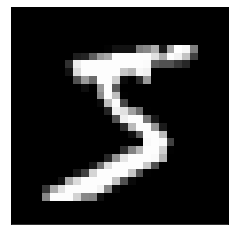

In [8]:
plt.imshow(x_train[0],cmap='gray')
plt.xticks([])
plt.yticks([])
y_train[0]

In [9]:
# side note: testing what np.reshape actually does 

a1 = np.arange(20).reshape((5,2,2))
print(a1)
print(np.shape(a1))
a2 = a1.reshape(5,4)
print(np.shape(a2))
print(a2)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]

 [[16 17]
  [18 19]]]
(5, 2, 2)
(5, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [12]:
# create classifier with LogisticRegression
clf = LogisticRegression(C=1e15, multi_class='multinomial', penalty='l2', solver='sag', tol=0.01)
# C = Inverse of regularization strength; must be a positive float.
# multi_class = choose binary or ‘multinomial’ problem
# solver = Algorithm to use in the optimization problem 
# for small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
# Tolerance for stopping criteria
# fit model according to given training data

# the clf fit takes the images as long 1D arrays, 
# print(np.shape(x_train)) # --> we reshape this so we have long 1D arrays: 60.000 arrays of length 784

clf.fit(x_train.reshape(60000,784), y_train) # reshaped x_train
score1 = clf.score(x_test.reshape((10000,784)), y_test) # reshaped x_train
print(f"score: {score1}") # the score returs R^2 which gives information about the goodness of fit. Best possible value=1 for perfect fit

score: 0.9265


In [11]:
# change some of the hyper parameters: 
# small value for C
clf = LogisticRegression(C=50, multi_class='multinomial', penalty='l2', solver='sag', tol=0.01)
clf.fit(x_train.reshape(60000,784), y_train)
score1 = clf.score(x_test.reshape((10000,784)), y_test)
print(f"score, C: {score1}")

# does not seem to make a big difference

score, C: 0.9263


In [ ]:
# small value for C
clf = LogisticRegression(C=1e15, multi_class='multinomial', penalty='l1', solver='saga', tol=0.01)
clf.fit(x_train.reshape(60000,784), y_train)
score1 = clf.score(x_test.reshape((10000,784)), y_test)
print(f"score, L1: {score1}") # solver saga accepts L1 penalty

### Find some digest that were not correctly classified

In [28]:
x_test = x_test.reshape((10000,784))

# boolean mask
predictions = clf.predict(x_test)
mask = (predictions != y_test) # list of true and false
# true = classified wrong, is not y_test

# look at result
print(mask[0:15])

x_true = x_test[mask]
y_true = y_test[mask]
predictions_true = predictions[mask]

print(np.shape(x_true)) # wrongly classified 

[False False False False False False False False  True False False False
 False False False]
(735, 784)


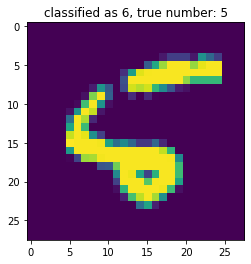

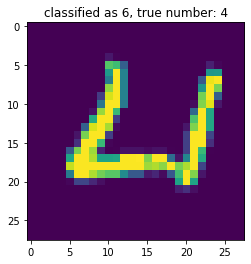

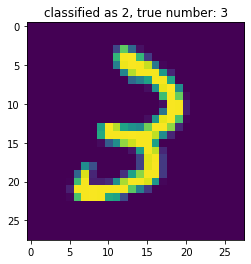

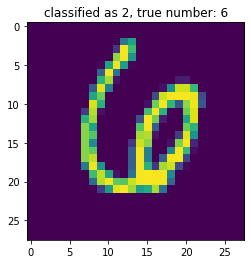

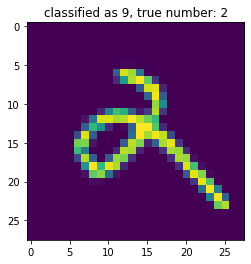

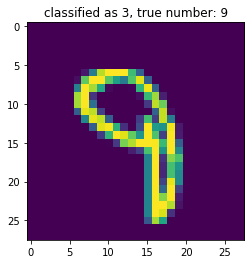

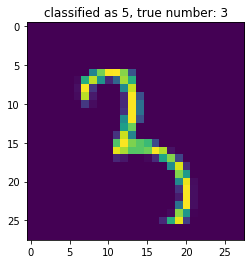

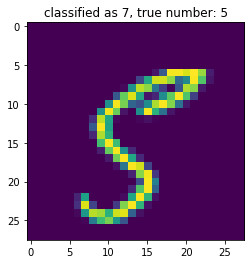

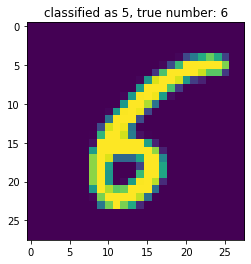

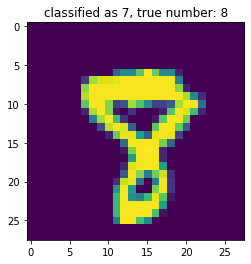

In [33]:
for i in range(10):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(x_true[i,].reshape(28,28))
    ax.set_title(f"classified as {predictions_true[i]}, true number: {y_true[i]}")

## SGDClassifier
- stochastic gradient descent

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
# create classifier and 
clf = (SGDClassifier(alpha=0.0001, class_weight=None, epsilon=0.1, eta0=0.0, fit_intercept=True,
                     l1_ratio=0.15, learning_rate='optimal', loss='hinge', n_jobs=1, 
                     penalty='l2', power_t=0.5, random_state=None, shuffle=False, 
                     verbose=0, warm_start=False))
clf.fit(x_train.reshape(60000,784), y_train)
score2 = clf.score(np.array(x_test).reshape((10000,784)), y_test)
print(f"score: {score2}")

score: 0.896
